In [226]:
import numpy as np
from scipy import stats
from scipy.fft import fft
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.max_rows", None)

In [227]:
dateDF = pd.read_excel("DSP_Data_with_Butas and date.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="A")

dateDF['Date'] = dateDF['Date']

dateDF

Date
0     10/17/2023_20:26:35
1     10/17/2023_20:41:37
2     10/17/2023_20:56:40
3     10/17/2023_21:11:43
4     10/17/2023_21:26:46
5     10/17/2023_21:41:49
6     10/17/2023_21:56:51
7     10/17/2023_22:11:54
8     10/17/2023_22:26:57
9     10/17/2023_22:41:55
10    10/17/2023_22:56:57
11    10/17/2023_23:11:59
12    10/17/2023_23:26:49
13    10/17/2023_23:41:51
14    10/17/2023_23:56:55
15    10/18/2023_00:11:13
16    10/18/2023_00:26:15
17    10/18/2023_00:31:13
18    10/18/2023_00:46:15
19    10/18/2023_01:01:18
20    10/18/2023_01:16:21
21    10/18/2023_01:31:24
22    10/18/2023_01:46:27
23    10/18/2023_02:01:30
24    10/18/2023_02:16:33
25    10/18/2023_02:31:36
26    10/18/2023_02:46:39
27    10/18/2023_03:01:41
28    10/18/2023_03:16:44
29    10/18/2023_03:31:46
30    10/18/2023_03:46:49
31    10/18/2023_04:01:52
32    10/18/2023_04:16:55
33    10/18/2023_04:31:57
34    10/18/2023_04:47:00
35    10/18/2023_05:02:02
36    10/18/2023_05:17:05
37    10/18/2023_05:32:07
38    10/18/2023_05:47:10
39    10/18/2023_06:02:13
40    10/18/2023_06:17:15
41    10/18/2023_06:32:19
42    10/18/2023_06:47:21
43    10/18/2023_07:02:23
44    10/18/2023_07:17:26
45    10/18/2023_07:32:28
46    10/18/2023_07:47:31
47    10/18/2023_08:02:33
48    10/18/2023_08:17:35
49    10/18/2023_08:32:38
50    10/18/2023_08:47:41
51    10/18/2023_09:02:43
52    10/18/2023_09:17:46
53    10/18/2023_09:32:49
54    10/18/2023_09:47:51
55    10/18/2023_10:02:54
56    10/18/2023_10:17:57
57    10/18/2023_10:32:59
58    10/18/2023_10:48:02
59    10/18/2023_11:03:05
60    10/18/2023_11:18:08
61    10/18/2023_11:33:10
62    10/18/2023_11:48:12
63    10/18/2023_12:03:15
64    10/18/2023_12:18:18
65    10/18/2023_12:33:21
66    10/18/2023_12:48:24
67    10/18/2023_13:03:26
68    10/18/2023_13:18:29
69    10/18/2023_13:33:31
70    10/18/2023_13:48:34
71    10/18/2023_14:03:36
72    10/18/2023_14:18:39
73    10/18/2023_14:33:41
74    10/18/2023_14:48:44
75    10/18/2023_15:03:47
76    10/18/2023_15:18:50
77    10/18/2023_15:33:52
78    10/18/2023_15:48:55
79    10/18/2023_16:03:59
80    10/18/2023_16:19:01
81    10/18/2023_16:34:03
82    10/18/2023_16:49:06
83    10/18/2023_17:04:09
84    10/18/2023_17:19:11
85    10/18/2023_17:34:14
86    10/18/2023_17:49:16
87    10/18/2023_18:04:18
88    10/18/2023_18:19:21
89    10/18/2023_18:34:23
90    10/18/2023_18:49:27
91    10/18/2023_19:04:29
92    10/18/2023_19:19:32
93    10/18/2023_19:34:35
94    10/18/2023_19:49:37
95    10/18/2023_20:04:40
96    10/18/2023_20:19:42
97    10/18/2023_20:34:45
98    10/18/2023_20:49:48
99    10/18/2023_21:04:50
100   10/18/2023_21:19:53
101   10/18/2023_21:34:55
102   10/18/2023_21:49:58
103   10/18/2023_22:05:01
104   10/18/2023_22:20:03
105   10/18/2023_22:35:06
106   10/18/2023_22:50:09
107   10/18/2023_23:05:12
108   10/18/2023_23:20:15
109   10/18/2023_23:35:17
110   10/18/2023_23:50:20
111   10/19/2023_00:05:24
112   10/19/2023_00:20:26
113   10/19/2023_00:35:29
114   10/19/2023_00:50:31
115   10/19/2023_01:05:34
116   10/19/2023_01:20:36
117   10/19/2023_01:35:39
118   10/19/2023_01:50:41
119   10/19/2023_02:05:44
120   10/19/2023_02:20:46
121   10/19/2023_02:35:48
122   10/19/2023_02:50:51
123   10/19/2023_03:05:54
124   10/19/2023_03:20:57
125   10/19/2023_03:35:59
126   10/19/2023_03:51:02
127   10/19/2023_04:06:04
128   10/19/2023_04:21:06
129   10/19/2023_04:36:09
130   10/19/2023_04:51:12
131   10/19/2023_05:06:14
132   10/19/2023_05:21:17
133   10/19/2023_05:36:19
134   10/19/2023_05:51:22
135   10/19/2023_06:06:24
136   10/19/2023_06:21:27
137   10/19/2023_06:36:30
138   10/19/2023_06:51:33
139   10/19/2023_07:06:36
140   10/19/2023_07:21:38
141   10/19/2023_07:36:40
142   10/19/2023_07:51:43
143   10/19/2023_08:06:45
144   10/19/2023_08:21:47
145   10/19/2023_08:36:50
146   10/19/2023_08:51:53
147   10/19/2023_09:06:55
148   10/19/2023_09:21:58
149   10/19/2023_09:37:00
150   10/19/2023_09:52:03
151   10/19/2023_10:07:05
152   10/19/2023_10:22:08
153   10/19/2023_

In [228]:
humiDF = pd.read_excel("DSP_Data_with_Butas and date.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="B")

humiDF['Humidity (%)'] = humiDF['Humidity (%)'].interpolate()

humiDF

Humidity (%)
0        66.100000
1        66.000000
2        61.100000
3        59.500000
4        61.500000
5        59.700000
6        60.200000
7        60.400000
8        61.300000
9        62.500000
10       63.700000
11       64.900000
12       66.100000
13       67.300000
14       68.500000
15       69.700000
16       70.900000
17       72.100000
18       72.100000
19       68.600000
20       67.900000
21       66.700000
22       66.900000
23       67.400000
24       68.200000
25       69.500000
26       69.600000
27       68.500000
28       67.100000
29       65.900000
30       66.200000
31       66.000000
32       66.300000
33       67.800000
34       68.900000
35       69.500000
36       69.600000
37       70.000000
38       69.900000
39       70.200000
40       70.400000
41       70.400000
42       70.700000
43       70.300000
44       70.300000
45       70.600000
46       71.100000
47       70.500000
48       70.100000
49       69.600000
50       68.900000
51       67.600000
52       66.200000
53       66.100000
54       64.800000
55       65.800000
56       64.300000
57       62.800000
58       62.400000
59       62.400000
60       62.000000
61       61.100000
62       58.700000
63       57.100000
64       56.700000
65       56.800000
66       55.000000
67       57.500000
68       56.300000
69       58.200000
70       57.900000
71       58.800000
72       58.900000
73       59.200000
74       57.300000
75       57.900000
76       57.800000
77       59.400000
78       62.800000
79       61.800000
80       61.600000
81       58.900000
82       58.900000
83       60.600000
84       59.500000
85       60.200000
86       60.900000
87       63.600000
88       65.600000
89       66.200000
90       67.400000
91       68.800000
92       68.800000
93       69.600000
94       69.200000
95       68.900000
96       68.600000
97       70.200000
98       70.000000
99       69.700000
100      70.000000
101      70.400000
102      69.300000
103      70.800000
104      70.800000
105      70.800000
106      70.600000
107      72.000000
108      72.600000
109      72.800000
110      73.400000
111      72.400000
112      73.800000
113      74.500000
114      73.100000
115      74.600000
116      69.800000
117      68.400000
118      68.000000
119      68.100000
120      67.500000
121      66.000000
122      67.300000
123      66.300000
124      66.800000
125      67.300000
126      67.300000
127      66.900000
128      66.900000
129      66.700000
130      65.900000
131      66.200000
132      66.000000
133      66.000000
134      65.800000
135      66.200000
136      66.200000
137      66.400000
138      67.100000
139      67.800000
140      69.000000
141      71.900000
142      69.900000
143      69.700000
144      69.500000
145      70.000000
146      71.400000
147      72.200000
148      72.700000
149      73.200000
150      73.200000
151      73.600000
152      73.900000
153      73.500000
154      74.200000
155      74.300000
156      74.200000
157      74.200000
158      74.600000
159      74.200000
160      73.900000
161      74.200000
162      73.900000
163      73.700000
164      73.200000
165      72.400000
166      72.500000
167      73.400000
168      71.900000
169      70.900000
170      69.900000
171      69.300000
172      69.200000
173      69.400000
174      69.500000
175      68.700000
176      68.300000
177      68.000000
178      68.500000
179      69.200000
180      69.200000
181      69.500000
182      69.400000
183      70.100000
184      70.400000
185      71.000000
186      70.500000
187      70.500000
188      71.200000
189      73.400000
190      71.800000
191      71.400000
192      71.200000
193      71.000000
194      72.400000
195      71.800000
196      71.900000
197      71.400000
198      71.100000
199      70.500000
200      70.700000
201      70.800000
202      70.400000
203      70.900000
204      77.300000
205      80.500000
206      81.200000
207      80.700000
208      78.600000
209      74.3000

In [229]:
tempDF = pd.read_excel("DSP_Data_with_Butas and date.xlsx", "Sheet1", skiprows=0, nrows= 1350, usecols="C")

tempDF['Temperature (°C)'] = tempDF['Temperature (°C)'].interpolate()

tempDF

Temperature (°C)
0            32.600000
1            32.600000
2            34.800000
3            35.200000
4            33.700000
5            35.200000
6            34.300000
7            34.700000
8            34.800000
9            34.311111
10           33.822222
11           33.333333
12           32.844444
13           32.355556
14           31.866667
15           31.377778
16           30.888889
17           30.400000
18           30.400000
19           32.000000
20           31.700000
21           33.000000
22           32.900000
23           32.700000
24           32.500000
25           31.200000
26           31.300000
27           31.900000
28           31.800000
29           32.800000
30           32.700000
31           32.900000
32           32.800000
33           32.300000
34           32.100000
35           30.900000
36           31.100000
37           31.200000
38           31.700000
39           31.700000
40           31.700000
41           31.700000
42           31.700000
43           31.900000
44           31.900000
45           31.900000
46           31.900000
47           32.200000
48           32.300000
49           32.500000
50           32.800000
51           32.300000
52           33.300000
53           33.100000
54           33.400000
55           32.300000
56           33.700000
57           34.900000
58           34.700000
59           34.100000
60           34.200000
61           34.300000
62           35.800000
63           36.200000
64           35.400000
65           36.200000
66           36.600000
67           35.900000
68           35.100000
69           35.600000
70           35.600000
71           35.600000
72           35.600000
73           34.500000
74           36.400000
75           35.600000
76           36.300000
77           36.000000
78           35.200000
79           35.600000
80           34.300000
81           35.200000
82           35.200000
83           35.100000
84           35.100000
85           33.900000
86           34.200000
87           34.700000
88           34.500000
89           34.500000
90           34.300000
91           32.900000
92           33.100000
93           33.200000
94           33.700000
95           33.700000
96           33.500000
97           32.600000
98           33.200000
99           33.200000
100          33.000000
101          32.900000
102          33.000000
103          32.600000
104          32.700000
105          32.600000
106          32.700000
107          32.500000
108          31.200000
109          31.800000
110          31.000000
111          31.300000
112          31.900000
113          31.100000
114          31.800000
115          30.700000
116          32.600000
117          33.300000
118          32.300000
119          33.000000
120          32.200000
121          33.300000
122          32.900000
123          33.200000
124          33.100000
125          33.000000
126          33.000000
127          32.900000
128          32.900000
129          32.900000
130          32.900000
131          32.500000
132          32.700000
133          32.600000
134          32.500000
135          32.100000
136          32.300000
137          32.500000
138          32.600000
139          32.500000
140          32.500000
141          31.200000
142          32.400000
143          32.500000
144          32.400000
145          32.300000
146          32.300000
147          32.200000
148          32.200000
149          31.000000
150          31.000000
151          31.000000
152          31.200000
153          31.300000
154          31.100000
155          31.500000
156          31.700000
157          31.700000
158          31.700000
159          31.800000
160          31.800000
161          31.600000
162          31.700000
163          31.600000
164          31.500000
165          31.100000
166          32.200000
167          31.100000
168          31.200000
169          32.400000
170          32.500000
171          32.600000
172          32.500000
173 

In [231]:
datetemphumiDF = pd.DataFrame()

datetemphumiDF = pd.concat([dateDF, humiDF, tempDF], axis=1)

datetemphumiDF


Date  Humidity (%)  Temperature (°C)
0     10/17/2023_20:26:35     66.100000         32.600000
1     10/17/2023_20:41:37     66.000000         32.600000
2     10/17/2023_20:56:40     61.100000         34.800000
3     10/17/2023_21:11:43     59.500000         35.200000
4     10/17/2023_21:26:46     61.500000         33.700000
5     10/17/2023_21:41:49     59.700000         35.200000
6     10/17/2023_21:56:51     60.200000         34.300000
7     10/17/2023_22:11:54     60.400000         34.700000
8     10/17/2023_22:26:57     61.300000         34.800000
9     10/17/2023_22:41:55     62.500000         34.311111
10    10/17/2023_22:56:57     63.700000         33.822222
11    10/17/2023_23:11:59     64.900000         33.333333
12    10/17/2023_23:26:49     66.100000         32.844444
13    10/17/2023_23:41:51     67.300000         32.355556
14    10/17/2023_23:56:55     68.500000         31.866667
15    10/18/2023_00:11:13     69.700000         31.377778
16    10/18/2023_00:26:15     70.900000         30.888889
17    10/18/2023_00:31:13     72.100000         30.400000
18    10/18/2023_00:46:15     72.100000         30.400000
19    10/18/2023_01:01:18     68.600000         32.000000
20    10/18/2023_01:16:21     67.900000         31.700000
21    10/18/2023_01:31:24     66.700000         33.000000
22    10/18/2023_01:46:27     66.900000         32.900000
23    10/18/2023_02:01:30     67.400000         32.700000
24    10/18/2023_02:16:33     68.200000         32.500000
25    10/18/2023_02:31:36     69.500000         31.200000
26    10/18/2023_02:46:39     69.600000         31.300000
27    10/18/2023_03:01:41     68.500000         31.900000
28    10/18/2023_03:16:44     67.100000         31.800000
29    10/18/2023_03:31:46     65.900000         32.800000
30    10/18/2023_03:46:49     66.200000         32.700000
31    10/18/2023_04:01:52     66.000000         32.900000
32    10/18/2023_04:16:55     66.300000         32.800000
33    10/18/2023_04:31:57     67.800000         32.300000
34    10/18/2023_04:47:00     68.900000         32.100000
35    10/18/2023_05:02:02     69.500000         30.900000
36    10/18/2023_05:17:05     69.600000         31.100000
37    10/18/2023_05:32:07     70.000000         31.200000
38    10/18/2023_05:47:10     69.900000         31.700000
39    10/18/2023_06:02:13     70.200000         31.700000
40    10/18/2023_06:17:15     70.400000         31.700000
41    10/18/2023_06:32:19     70.400000         31.700000
42    10/18/2023_06:47:21     70.700000         31.700000
43    10/18/2023_07:02:23     70.300000         31.900000
44    10/18/2023_07:17:26     70.300000         31.900000
45    10/18/2023_07:32:28     70.600000         31.900000
46    10/18/2023_07:47:31     71.100000         31.900000
47    10/18/2023_08:02:33     70.500000         32.200000
48    10/18/2023_08:17:35     70.100000         32.300000
49    10/18/2023_08:32:38     69.600000         32.500000
50    10/18/2023_08:47:41     68.900000         32.800000
51    10/18/2023_09:02:43     67.600000         32.300000
52    10/18/2023_09:17:46     66.200000         33.300000
53    10/18/2023_09:32:49     66.100000         33.100000
54    10/18/2023_09:47:51     64.800000         33.400000
55    10/18/2023_10:02:54     65.800000         32.300000
56    10/18/2023_10:17:57     64.300000         33.700000
57    10/18/2023_10:32:59     62.800000         34.900000
58    10/18/2023_10:48:02     62.400000         34.700000
59    10/18/2023_11:03:05     62.400000         34.100000
60    10/18/2023_11:18:08     62.000000         34.200000
61    10/18/2023_11:33:10     61.100000         34.300000
62    10/18/2023_11:48:12     58.700000         35.800000
63    10/18/2023_12:03:15     57.100000         36.200000
64    10/18/2023_12:18:18     56.700000         35.400000
65    10/18/2023_12:33:21     56.800000         36.200000
66    10/18/2023_12:48:24     55.000000         36.600000
67    10/18/2023_13:03:26     57.500000         35.900000
68    10/18/2023_13

In [210]:
# datetemphumiDF[['Month', 'Day', 'Year']] = datetemphumiDF['Date'].str.split('/', expand=True)
# Friday_20 = datetemphumiDF[datetemphumiDF['Day'] == '20']
# Friday_27 = datetemphumiDF[datetemphumiDF['Day'] == '27']

# print("Friday 20")
# print(Friday_20)
# print("Friday 27")
# print(Friday_27)



FRIDAY DATA SPLITTING

In [319]:

datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Friday = datetemphumiDF[(datetemphumiDF['Day'] == '20') | (datetemphumiDF['Day'] == '27')]
Friday_20 = datetemphumiDF[datetemphumiDF['Day'] == '20']
Friday_27 = datetemphumiDF[datetemphumiDF['Day'] == '27']

print("Friday 20")
print(Friday_20[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Friday 27")
print(Friday_27[['Time', 'Temperature (°C)', 'Humidity (%)']])

Friday 20
         Time  Temperature (°C)  Humidity (%)
207  00:09:28              29.1          80.7
208  00:24:31              29.8          78.6
209  00:39:34              31.5          74.3
210  00:54:36              31.5          73.0
211  01:09:38              30.4          74.2
212  01:24:42              31.2          72.6
213  01:39:44              30.3          74.1
214  01:54:48              30.6          74.0
215  02:09:51              31.2          71.8
216  02:24:54              31.6          72.4
217  02:39:56              30.6          72.3
218  02:54:58              31.2          72.6
219  03:10:01              31.6          72.6
220  03:25:03              30.4          73.4
221  03:40:06              30.4          73.2
222  03:55:08              30.7          72.0
223  04:10:12              31.1          72.6
224  04:25:15              31.1          73.9
225  04:40:17              30.4          74.2
226  04:55:20              30.3          74.4
227  05:10:22           

FRIDAY TEMPERATURE MEAN, MEDIAN, AND MODE

In [320]:
Friday_temperatures = Friday['Temperature (°C)']

mean_temperature = Friday_temperatures.mean()
median_temperature = Friday_temperatures.median()
mode_temperature = Friday_temperatures.mode().values[0]

fritempdata = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [mean_temperature, median_temperature, mode_temperature]
})
print(fritempdata)


               Metric      Value
0    Mean Temperature  32.767539
1  Median Temperature  32.800000
2    Mode Temperature  34.000000


FRIDAY HUMIDITY MEAN, MEDIAN, AND MODE

In [321]:
Friday_humidity = Friday['Humidity (%)'] 

mean_humidity = Friday_humidity.mean()
median_humidity = Friday_humidity.median()
mode_humidity = Friday_humidity.mode().values[0]

frihumiddata = pd.DataFrame({
    'Metric': ['Mean Humidity', 'Median Humidity', 'Mode Humidity'],
    'Value': [mean_humidity, median_humidity, mode_humidity]
})
print(frihumiddata)

            Metric      Value
0    Mean Humidity  64.641885
1  Median Humidity  67.900000
2    Mode Humidity  69.100000


In [260]:
Friday_temperatures = [Friday_20, Friday_27] 
plt.figure(figsize=(25, 15), dpi=500)
position = 1
tempIndex = 0

for FridayCombT in Friday_temperatures:
    plt.subplot(1, 2, position)
    timestamps = FridayCombT['Time']
    temperatures = FridayCombT['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Friday")
    plt.xlabel("Time")
    plt.ylabel("October 20 and 27 Temperature")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()


In [181]:
Friday_humidity = [Friday_20, Friday_27] 
plt.figure(figsize=(25, 15), dpi=500)
position = 1
tempIndex = 0

for FridayCombH in Friday_humidity:
    plt.subplot(1, 2, position)
    timestamps = FridayCombH['Time']
    temperatures = FridayCombH['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Friday")
    plt.xlabel("Time")
    plt.ylabel("October 20 and 27 Humidity")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

FRIDAY TEMPERATURE HISTOGRAM

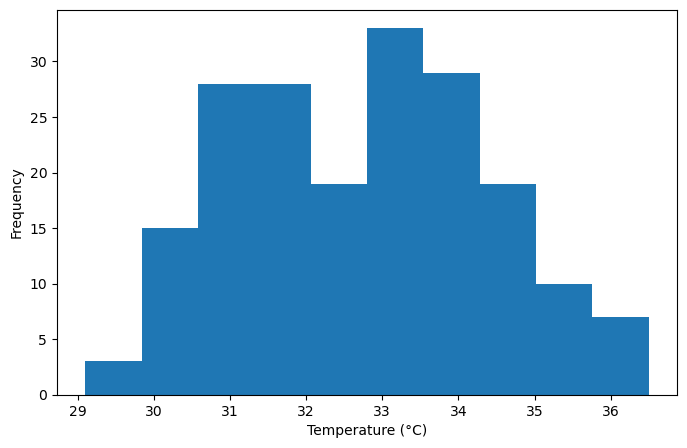

In [340]:
Friday_temperatures = [Friday_20, Friday_27] 
FriComHistoTemp = []

for i in Friday_temperatures:
    for fritemp in i["Temperature (°C)"]:
        FriComHistoTemp.append(fritemp)

plt.figure(figsize=(8, 5))
plt.hist(FriComHistoTemp)
plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')
plt.show()

FRIDAY HUMIDITY HISTOGRAM

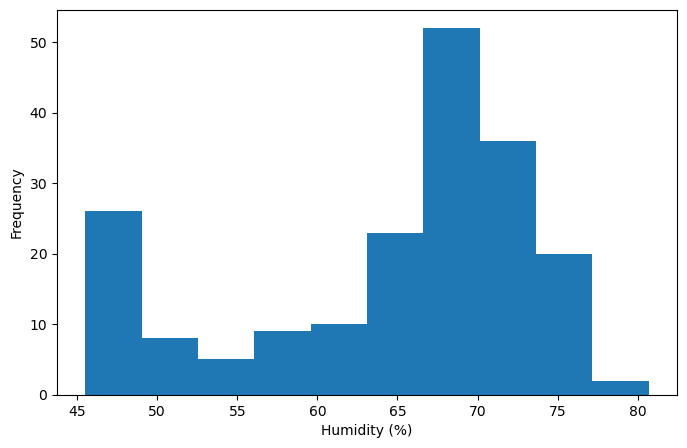

In [341]:
Friday_humidity = [Friday_20, Friday_27] 
FriComHistoHum = []

for i in Friday_humidity:
    for frihum in i["Humidity (%)"]:
        FriComHistoHum.append(frihum)

plt.figure(figsize=(8, 5))
plt.hist(FriComHistoHum)
plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')
plt.show()

SATURDAY DATA SPLITTING

In [263]:
datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Saturday = datetemphumiDF[(datetemphumiDF['Day'] == '21') | (datetemphumiDF['Day'] == '28')]
Saturday_21 = datetemphumiDF[datetemphumiDF['Day'] == '21']
Saturday_28 = datetemphumiDF[datetemphumiDF['Day'] == '28']
print("Saturday 21")
print(Saturday_21[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Saturday 28")
print(Saturday_28[['Time', 'Temperature (°C)', 'Humidity (%)']])


Saturday 21
         Time  Temperature (°C)  Humidity (%)
303  00:13:39              31.7          73.0
304  00:28:42              30.7          73.4
305  00:43:45              30.7          73.6
306  00:58:48              30.4          74.2
307  01:13:51              30.9          73.7
308  01:28:53              30.5          74.4
309  01:43:56              31.0          74.5
310  01:58:58              31.3          75.0
311  02:14:01              31.3          76.5
312  02:29:03              31.3          76.5
313  02:44:06              31.3          76.3
314  02:59:08              31.1          77.1
315  03:14:11              31.3          76.8
316  03:29:13              31.3          76.8
317  03:44:17              31.2          77.4
318  03:59:19              31.2          77.4
319  04:14:21              31.1          77.9
320  04:29:24              31.0          77.9
321  04:44:27              31.2          77.1
322  04:59:29              31.1          76.6
323  05:14:31         

SATURDAY TEMPERATURE MEAN, MEDIAN, AND MODE

In [265]:
Saturday_temperatures = Saturday['Temperature (°C)']

Sat_mean_temperature = Saturday_temperatures.mean()
Sat_median_temperature = Saturday_temperatures.median()
Sat_mode_temperature = Saturday_temperatures.mode().values[0]

sattempdata = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [Sat_mean_temperature, Sat_median_temperature, Sat_mode_temperature]
})
print(sattempdata)


               Metric      Value
0    Mean Temperature  32.365445
1  Median Temperature  31.700000
2    Mode Temperature  30.700000


SATURDAY HUMIDITY MEAN, MEDIAN, AND MODE

In [266]:
Saturday_humidity = Saturday['Humidity (%)'] 

Sat_mean_humidity = Saturday_humidity.mean()
Sat_median_humidity = Saturday_humidity.median()
Sat_mode_humidity = Saturday_humidity.mode().values[0]

sathumdata = pd.DataFrame({
    'Metric': ['Mean Humidity', 'Median Humidity', 'Mode Humidity'],
    'Value': [Sat_mean_humidity, Sat_median_humidity, Sat_mode_humidity]
})
print(sathumdata)


            Metric     Value
0    Mean Humidity  66.14555
1  Median Humidity  69.20000
2    Mode Humidity  69.20000


In [268]:
Saturday_temperatures = [Saturday_21, Saturday_28] 
plt.figure(figsize=(25, 15), dpi=500)
position = 1
tempIndex = 0

for SatCombT in Saturday_temperatures:
    plt.subplot(1, 2, position)
    timestamps = SatCombT['Time']
    temperatures = SatCombT['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Saturday")
    plt.xlabel("Time")
    plt.ylabel("October 21 and 28 Temperature")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

In [269]:
Saturday_humidity = [Saturday_21, Saturday_28] 
plt.figure(figsize=(25, 15), dpi=500)
position = 1
tempIndex = 0

for SatCombH in Saturday_humidity:
    plt.subplot(1, 2, position)
    timestamps = SatCombH['Time']
    temperatures = SatCombH['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Saturday")
    plt.xlabel("Time")
    plt.ylabel("October 21 and 28 Humidity")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

SATURDAY TEMPERATURE HISTOGRAM

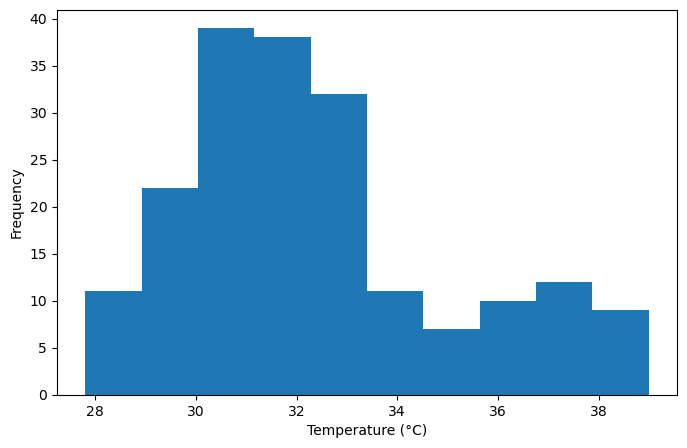

In [342]:
Saturday_temperatures = [Saturday_21, Saturday_28] 
SatComHistoTemp = []

for i in Saturday_temperatures:
    for sattemp in i["Temperature (°C)"]:
        SatComHistoTemp.append(sattemp)

plt.figure(figsize=(8, 5))
plt.hist(SatComHistoTemp)
plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')
plt.show() 

SATURDAY HUMIDITY HISTOGRAM

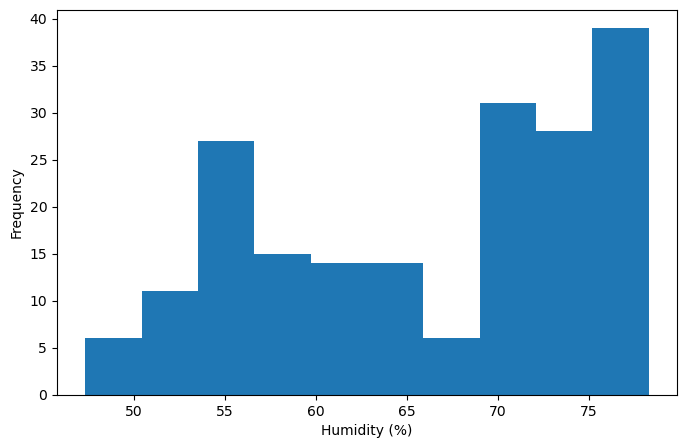

In [343]:
Saturday_humidity = [Saturday_21, Saturday_28] 
SatComHistoHum = []

for i in Saturday_humidity:
    for sathum in i["Humidity (%)"]:
        SatComHistoHum.append(sathum)

plt.figure(figsize=(8, 5))
plt.hist(SatComHistoHum)
plt.xlabel("Humidity (%)")
plt.ylabel('Frequency')
plt.show() 

SUNDAY DATA SPLITTING

In [285]:

datetemphumiDF['Date'] = pd.to_datetime(datetemphumiDF['Date'], format='%m/%d/%Y_%H:%M:%S')
datetemphumiDF['Time'] = datetemphumiDF['Date'].dt.time
Sunday = datetemphumiDF[(datetemphumiDF['Day'] == '22') | (datetemphumiDF['Day'] == '29')]
Sunday_22 = datetemphumiDF[datetemphumiDF['Day'] == '22']
Sunday_29 = datetemphumiDF[datetemphumiDF['Day'] == '29']

print("Sunday 22")
print(Sunday_22[['Time', 'Temperature (°C)', 'Humidity (%)']])

print("Sunday 29")
print(Sunday_29[['Time', 'Temperature (°C)', 'Humidity (%)']])

Sunday 22
         Time  Temperature (°C)  Humidity (%)
398  00:02:54            29.600         73.40
399  00:17:57            29.600         73.80
400  00:32:59            29.600         73.50
401  00:48:02            29.600         73.70
402  01:03:04            29.700         73.70
403  01:17:04            29.715         73.78
404  01:32:04            29.730         73.86
405  01:48:04            29.745         73.94
406  02:02:04            29.760         74.02
407  02:17:04            29.775         74.10
408  02:32:04            29.790         74.18
409  02:48:04            29.805         74.26
410  03:02:04            29.820         74.34
411  03:17:04            29.835         74.42
412  03:32:04            29.850         74.50
413  03:48:04            29.865         74.58
414  04:02:04            29.880         74.66
415  04:17:04            29.895         74.74
416  04:32:04            29.910         74.82
417  04:48:04            29.925         74.90
418  05:02:04           

SUNDAY MEAN, MEDIAN, AND MODE

In [279]:
Sunday_temperatures = Sunday['Temperature (°C)']

Sun_mean_temperature = Sunday_temperatures.mean()
Sun_median_temperature = Sunday_temperatures.median()
Sun_mode_temperature = Sunday_temperatures.mode().values[0]

suntempdata = pd.DataFrame({
    'Metric': ['Mean Temperature', 'Median Temperature', 'Mode Temperature'],
    'Value': [Sun_mean_temperature, Sun_median_temperature, Sun_mode_temperature]
})

print(suntempdata)

               Metric      Value
0    Mean Temperature  32.974863
1  Median Temperature  33.100000
2    Mode Temperature  33.400000


In [280]:
Sunday_humidity = Sunday['Humidity (%)'] 

Sun_mean_humidity = Sunday_humidity.mean()
Sun_median_humidity = Sunday_humidity.median()
Sun_mode_humidity = Sunday_humidity.mode().values[0]

sunhumdata = pd.DataFrame({
    'Metric': ['Mean Humidity', 'Median Humidity', 'Mode Humidity'],
    'Value': [Sun_mean_humidity, Sun_median_humidity, Sun_mode_humidity]
})


print(sunhumdata)

            Metric     Value
0    Mean Humidity  62.99235
1  Median Humidity  62.90000
2    Mode Humidity  49.80000


SUNDAY TEMPERATURE GRAPH

In [281]:
Sunday_temperatures = [Sunday_22, Sunday_29] 
plt.figure(figsize=(30, 15), dpi=500)
position = 1
tempIndex = 0

for SunCombT in Sunday_temperatures:
    plt.subplot(1, 2, position)
    timestamps = SunCombT['Time']
    temperatures = SunCombT['Temperature (°C)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Sunday")
    plt.xlabel("Time")
    plt.ylabel("October 22 and 29 Temperature")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

SUNDAY HUMIDITY GRAPH

In [282]:
Sunday_humidity = [Sunday_22, Sunday_29] 
plt.figure(figsize=(25, 15), dpi=500)
position = 1
tempIndex = 0

for SunCombH in Sunday_humidity:
    plt.subplot(1, 2, position)
    timestamps = SunCombH['Time']
    temperatures = SunCombH['Humidity (%)']

    time_labels = [t.strftime('%H:%M') for t in timestamps]

    plt.scatter(time_labels, temperatures, marker='.', color='blue')
    plt.title("Sunday")
    plt.xlabel("Time")
    plt.ylabel("October 22 and 29 Humidity")
    plt.xticks(rotation=45) 
    plt.grid()

    position += 1
    tempIndex += 1

plt.tight_layout()  
plt.show()

SUNDAY TEMPERATURE HISTOGRAM

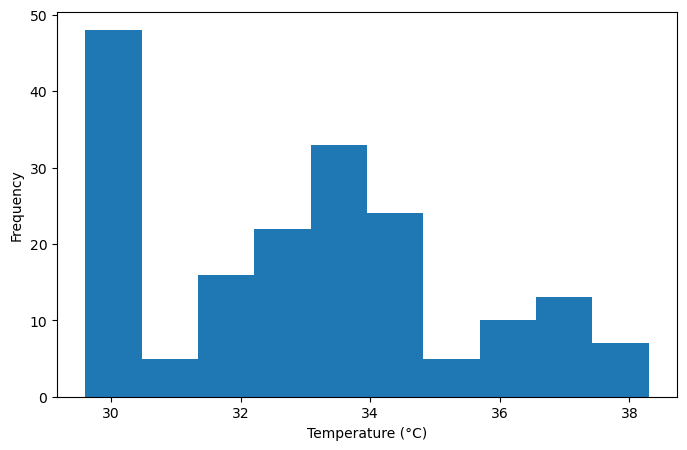

In [345]:
Sunday_temperatures = [Sunday_22, Sunday_29] 
SunComHistoTemp = []

for i in Sunday_temperatures:
    for suntemp in i["Temperature (°C)"]:
        SunComHistoTemp.append(suntemp)

plt.figure(figsize=(8, 5))
plt.hist(SunComHistoTemp)
plt.xlabel("Temperature (°C)")
plt.ylabel('Frequency')
plt.show() 

SUNDAY HUMIDITY HISTOGRAM

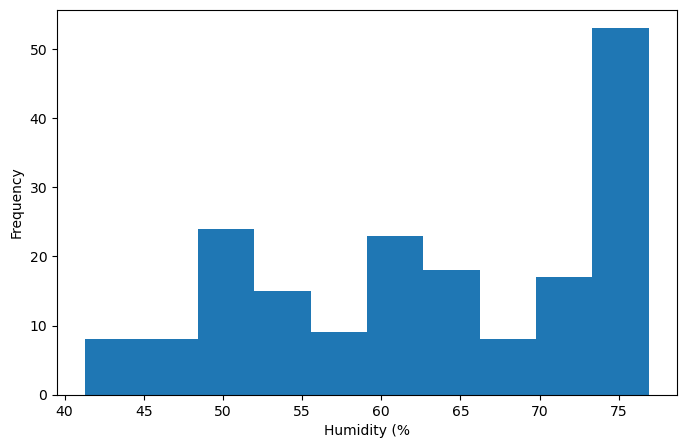

In [346]:
Sunday_humidity = [Sunday_22, Sunday_29] 
SunComHistoHum = []

for i in Sunday_humidity:
    for sunhum in i["Humidity (%)"]:
        SunComHistoHum.append(sunhum)

plt.figure(figsize=(8, 5))
plt.hist(SunComHistoHum)
plt.xlabel("Humidity (%")
plt.ylabel('Frequency')
plt.show() 